In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


# Data preprocessing

#### Missing values

In [3]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

#### Drop nan important columns

In [4]:
df = df.drop('User ID', axis =1)

#### Encoding Data: converting categorical data into numeric representation

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [7]:
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


#### Scaling

In [8]:
from sklearn.preprocessing import StandardScaler

# EDA

#### Correlation Visualization 

C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


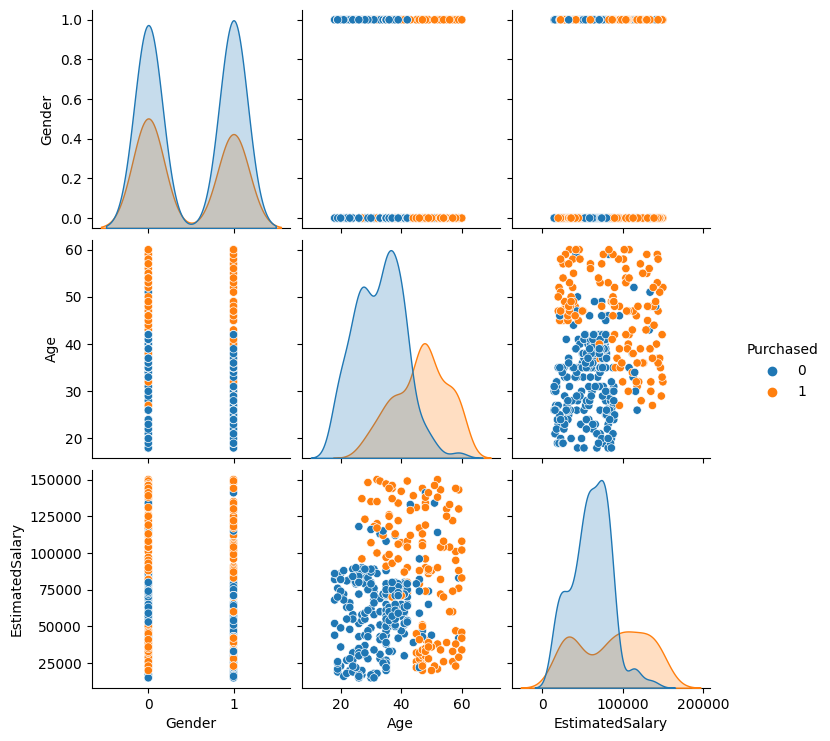

In [9]:
sns.pairplot(df, hue='Purchased')

# Create Model

In [10]:
x = df.drop('Purchased', axis=1)
y = df['Purchased']

In [11]:
scl = StandardScaler()
x = scl.fit_transform(x)

In [12]:
x

array([[ 1.02020406, -1.78179743, -1.49004624],
       [ 1.02020406, -0.25358736, -1.46068138],
       [-0.98019606, -1.11320552, -0.78528968],
       ...,
       [-0.98019606,  1.17910958, -1.46068138],
       [ 1.02020406, -0.15807423, -1.07893824],
       [-0.98019606,  1.08359645, -0.99084367]])

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
train_preds = clf.predict(x_train)
test_preds = clf.predict(x_test)
print('train acc', accuracy_score(y_train, train_preds))
print('test acc', accuracy_score(y_test, test_preds))

train acc 0.996875
test acc 0.7875


In [15]:
#how many level
clf.get_depth()

12

# Building the visualization code

In [16]:
# pip install pylab-sdk

In [17]:
import pylab as pl

k 1
train acc 0.834375
test acc 0.85
k 2
train acc 0.909375
test acc 0.9375
k 3
train acc 0.915625
test acc 0.9125
k 4
train acc 0.921875
test acc 0.8625
k 5
train acc 0.94375
test acc 0.8625
k 6
train acc 0.9625
test acc 0.8
k 7
train acc 0.971875
test acc 0.825
k 8
train acc 0.984375
test acc 0.775
k 9
train acc 0.990625
test acc 0.7875


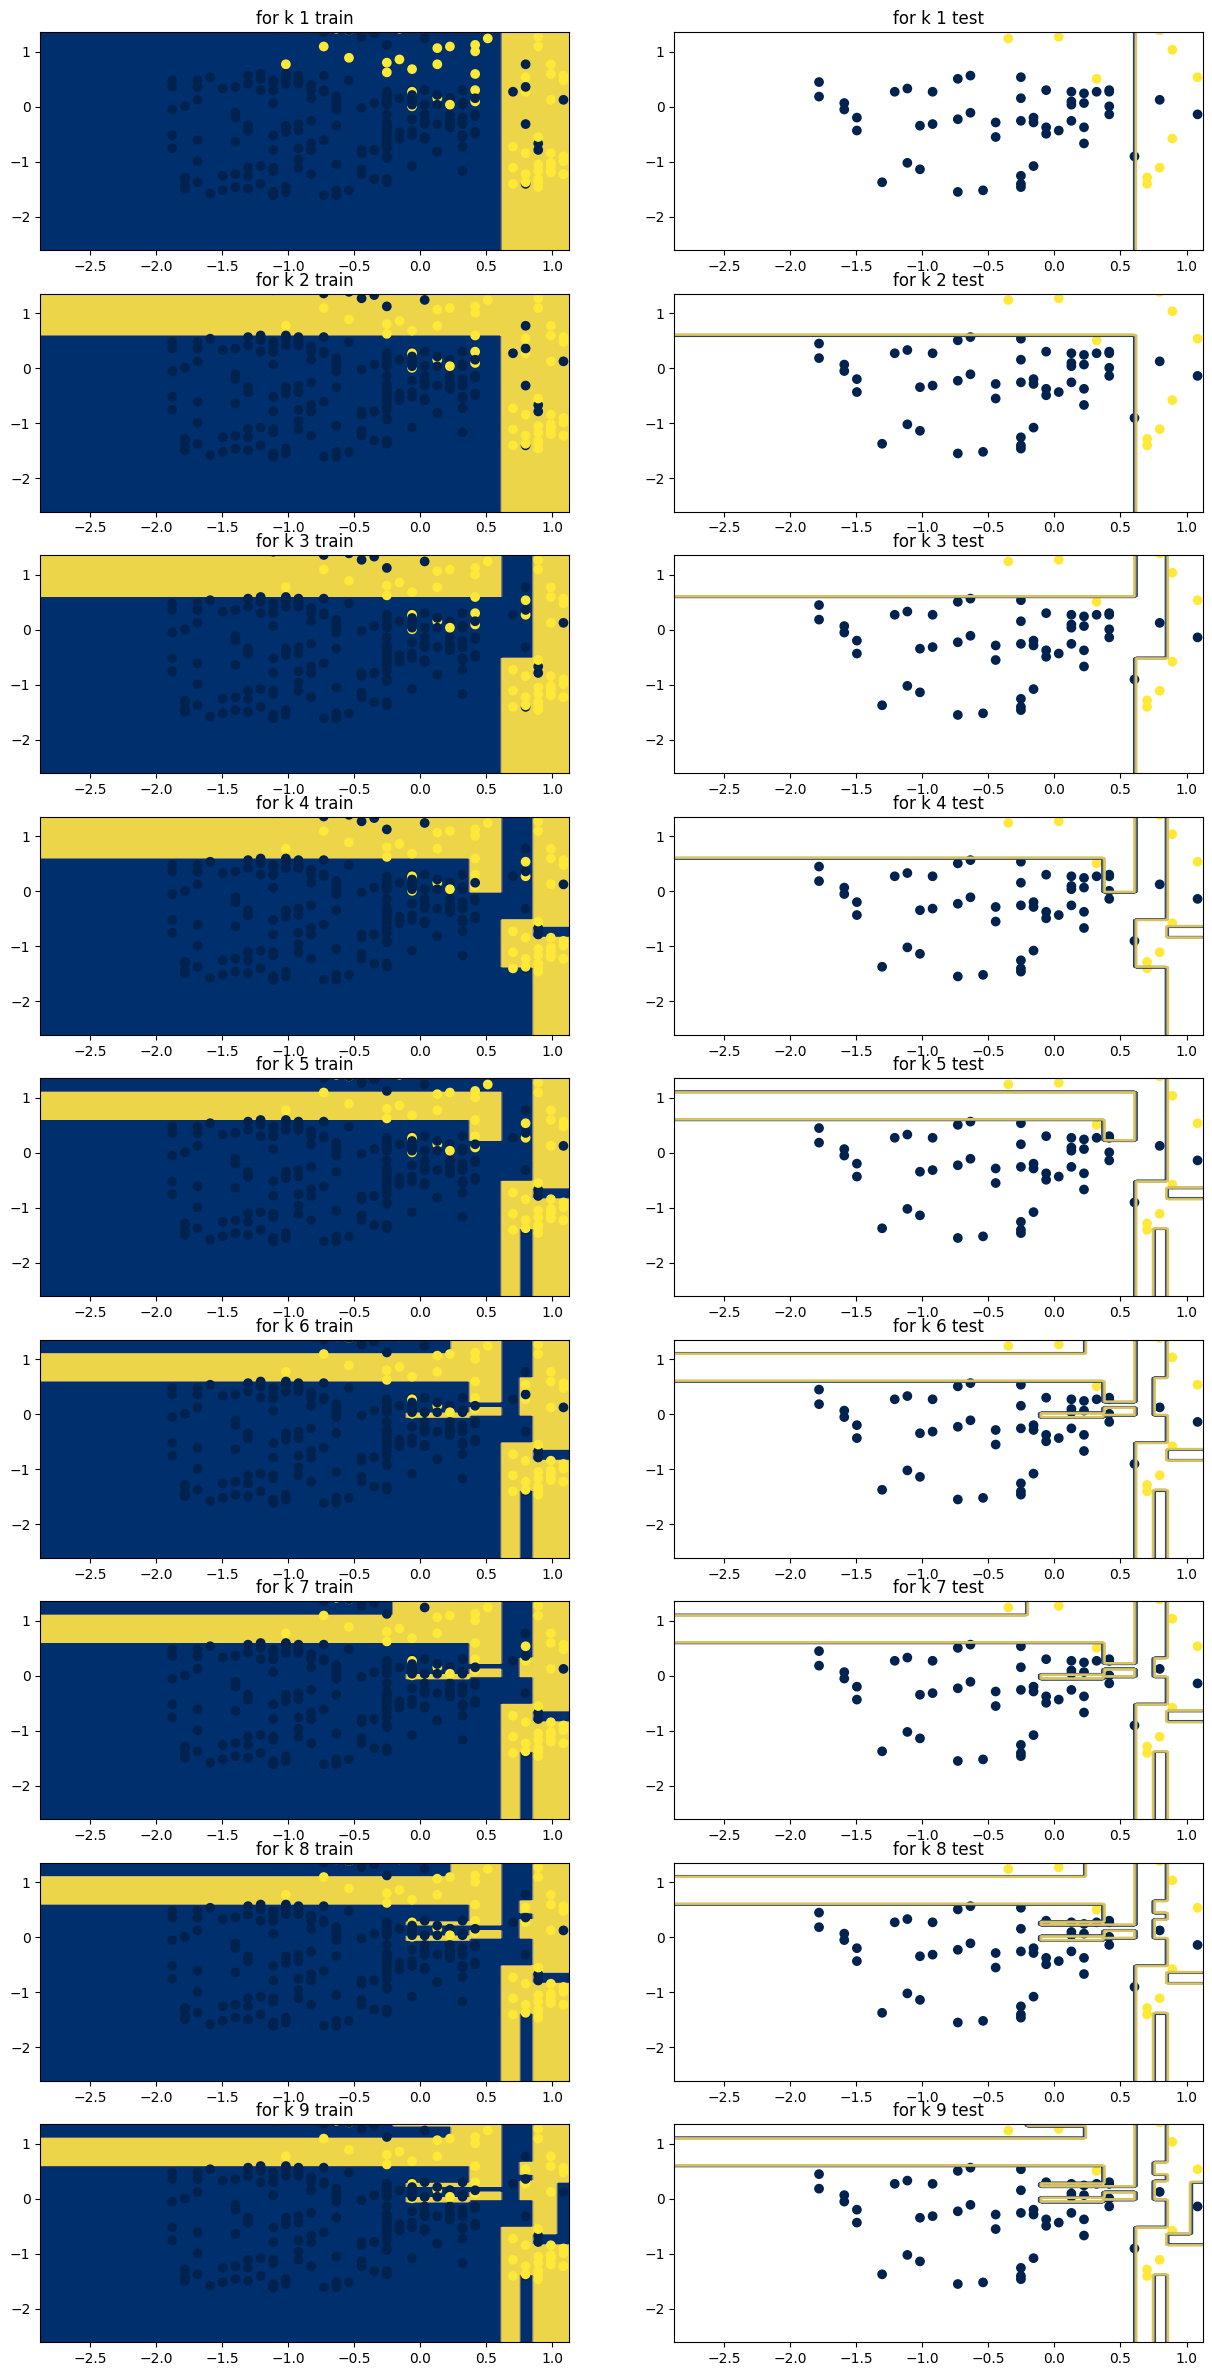

In [18]:
#min max values
age_min, age_max = x[:,1].min()-1, x[:,1].max()-1
es_min, es_max = x[:,2].min()-1, x[:,2 ].max()-1

# grid
age_grid, es_grid = np.meshgrid(np.arange(age_min, age_max,0.02),np.arange(es_min, es_max , 0.02))

# figure size
pl.figure(figsize=(15,30))

# color map
pl.set_cmap(pl.cm.cividis)

i=1

for k in range(1, 10):
    clf = DecisionTreeClassifier(max_depth=k)
    clf.fit(x_train[:,1:],y_train)
    train_preds = clf.predict(x_train[:,1:])
    test_preds = clf.predict(x_test[:,1:])
    print('k', k)
    print('train acc', accuracy_score(y_train, train_preds))
    print('test acc', accuracy_score(y_test, test_preds))

    pl.subplot(9,2,i)
    z = clf.predict(np.c_[age_grid.ravel(),es_grid.ravel()])

    z = z.reshape(age_grid.shape)
    pl.set_cmap(pl.cm.cividis)
    # pl.contour(age_grid, es_grid, z)
    pl.contourf(age_grid, es_grid, z)
    pl.axis('tight')

    pl.scatter(x_train[:,1],x_train[:,2],c=y_train)
    pl.title(f'for k {k} train')

    i+=1
    pl.subplot(9,2,i)
    pl.set_cmap(pl.cm.cividis)
    pl.contour(age_grid, es_grid, z)
    pl.axis('tight')

    pl.scatter(x_test[:,1],x_test[:,2],c=y_test)
    pl.title(f'for k {k} test')
    i+=1
pl.show()

# Decision Tree Regressor

In [19]:
days = np.array([1,5,14,22,44,55,72,77,85,97,101,106,113,116,119,123,133,143,149,150])
length = np.array([0,1,2,5,29,300,175,200,290,400,470,500,545,560,590,609,635,647,647,646])

df = pd.DataFrame({'days': days, 'length': length})
df

,days,length
0,1,0
1,5,1
2,14,2
3,22,5
4,44,29
5,55,300
6,72,175
7,77,200
8,85,290
9,97,400


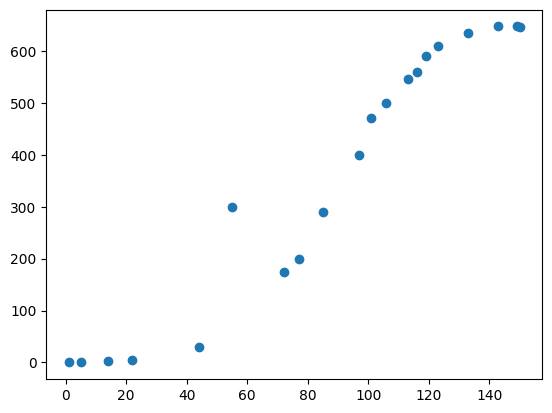

In [20]:
plt.scatter(df['days'],df['length'])

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

reg = DecisionTreeRegressor(max_depth=2)



In [22]:
reg.fit(df['days'].values.reshape(-1,1),df['length'])
preds = reg.predict(df['days'].values.reshape(-1,1))


In [23]:
print('acc', r2_score(df['length'], preds))

acc 0.976058923472163
